# 1. Data Scrapping

In [ ]:
# For yt comment sentiment
!pip install youtube-comment-downloader

In [ ]:
# Needed libraries
from youtube_comment_downloader import *
from itertools import islice
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Scraping function
def scraping(id_youtube, num):
  downloader = YoutubeCommentDownloader()
  comment = downloader.get_comments(id_youtube)
  data = [comment for comment in islice(comment, num)]
  df = pd.DataFrame(data)
  return df

In [ ]:
# Scrap 500 comments
df = scraping('M008SpVf7Hc', 500)
df

,cid,text,time,author,channel,votes,replies,photo,heart,reply,time_parsed
0,UgwK9jvH7KFze609O_Z4AaABAg,Rasakan diahirat sekarang menghadap Alloh sang...,10 dagen geleden,@NurIryani-h2d,UCUe91zhu8-GvGxwecA8nAMg,0,,https://yt3.ggpht.com/ytc/AIdro_nfsRMcdQ-VFoiG...,False,False,1.759677e+09
1,UgxlVr0dkPzERRLyHgh4AaABAg,"US bakal jauh lbh sayap kanan sih, opsi kanan ...",2 weken geleden,@nando7811,UCdoP-O-hMtifWMy1JNioDew,0,,https://yt3.ggpht.com/Ei8h_Q0erinfQ-I2IudP4RBa...,False,False,1.759332e+09
2,Ugw5lAehBA7koXDadUR4AaABAg,Ngomong2 himana nih kabarnya denhan UU perampa...,3 weken geleden,@joyprawiro,UCpKp7sfjT6NJDErPxZ7XShA,0,,https://yt3.ggpht.com/ytc/AIdro_k6M6pPi006S04v...,False,False,1.758727e+09
3,UgxnWpJtiWmB7Lbn2HJ4AaABAg,Rasis vs fasis,4 weken geleden,@joeabidenpapilaiyya5077,UCjnYMoWjIcJ324pJ-Q7G4Hw,0,,https://yt3.ggpht.com/n5JImlTtf_MmXIdgT3HTC-0G...,False,False,1.758122e+09
4,Ugw_irbaNq_nqqXMk2R4AaABAg,Allhamdullilah,4 weken geleden,@adrigo-b8p,UCsVQV1-Kn5Kt0YqiCVNPaKQ,0,,https://yt3.ggpht.com/pqy9Cet7-wF-yfeVz906WtwS...,False,False,1.758122e+09
...,...,...,...,...,...,...,...,...,...,...,...
495,Ugy96-Ajj7hwCaAX7Mt4AaABAg.AMuyuVWIlAAAMv2YNwMtU_,Di naskah proklamasi amrik memang dijamin KEBE...,1 maand geleden,@MrGusno,UC3TpwZ9Pnpi0f7jTzLbwKaw,0,,https://yt3.ggpht.com/ytc/AIdro_lSvnagKFmqo_7i...,False,True,1.757949e+09
496,UgwOVQSy9WaMnrIvJgB4AaABAg,Di US yg katanya negara paling mengutamakan de...,1 maand geleden (bewerkt),@llondoskyllondosky8565,UCtiy8w5OlhWFYXbXyzBkOdQ,0,3,https://yt3.ggpht.com/ytc/AIdro_lJ1S4BJYF-MvRg...,False,False,1.757949e+09
497,UgzUoDg69zjkCNDPEox4AaABAg,sayap kiri dibantai habis ...giliran sayap kan...,1 maand geleden,@BUDIMULLYYANA29,UC_KqZNex_r_n8u_HpwTX_MQ,11,1,https://yt3.ggpht.com/xgP5pipQ6ZX2vTQW_WZ9toRQ...,False,False,1.757949e+09
498,UgxbzLMDLWobD6WajmZ4AaABAg,"Dendam amarah bunuh orang, jelas kerjaan iblis...",1 maand geleden,@kariyatikuswandi8256,UCziTR7CKFN8OJEU9br_2-WA,0,,https://yt3.ggpht.com/ytc/AIdro_m4jJbEjL0SIaIO...,False,False,1.757949e+09


# 2. Data Cleaning & Prepocessing

In [ ]:
def cleaning_text(text):
  text = text.lower()
  text = re.sub(r'@\w+|#w+l', '', text)
  text = re.sub(r'http\S+|wwwS+|https\S+', '', text)
  text = text.strip()
  text = re.sub(r'(.)\1{2,}', r'\1\1', text)
  emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F700-\U0001F77F"  # alchemical symbols
        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supplemental Arrows-A
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols
        "\U00002702-\U000027B0"  # Dingbats
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
  text = emoji_pattern.sub(r'', text)
  return text

def preprocess_text(text):
  text = cleaning_text(text)
  tokens = word_tokenize(text)
  processed_tokens = tokens
  stop_words = set(stopwords.words('indonesian'))
  filtered_tokens = [word for word in processed_tokens if word not in stop_words]
  return ' '.join(filtered_tokens).strip()

In [ ]:
df['clean_text'] = df['text'].apply(preprocess_text)
df

,cid,text,time,author,channel,votes,replies,photo,heart,reply,time_parsed,clean_text
0,UgwK9jvH7KFze609O_Z4AaABAg,Rasakan diahirat sekarang menghadap Alloh sang...,10 dagen geleden,@NurIryani-h2d,UCUe91zhu8-GvGxwecA8nAMg,0,,https://yt3.ggpht.com/ytc/AIdro_nfsRMcdQ-VFoiG...,False,False,1.759677e+09,rasakan diahirat menghadap alloh sang pencipta
1,UgxlVr0dkPzERRLyHgh4AaABAg,"US bakal jauh lbh sayap kanan sih, opsi kanan ...",2 weken geleden,@nando7811,UCdoP-O-hMtifWMy1JNioDew,0,,https://yt3.ggpht.com/Ei8h_Q0erinfQ-I2IudP4RBa...,False,False,1.759332e+09,"us lbh sayap kanan sih , opsi kanan yg soft mo..."
2,Ugw5lAehBA7koXDadUR4AaABAg,Ngomong2 himana nih kabarnya denhan UU perampa...,3 weken geleden,@joyprawiro,UCpKp7sfjT6NJDErPxZ7XShA,0,,https://yt3.ggpht.com/ytc/AIdro_k6M6pPi006S04v...,False,False,1.758727e+09,ngomong2 himana nih kabarnya denhan uu perampa...
3,UgxnWpJtiWmB7Lbn2HJ4AaABAg,Rasis vs fasis,4 weken geleden,@joeabidenpapilaiyya5077,UCjnYMoWjIcJ324pJ-Q7G4Hw,0,,https://yt3.ggpht.com/n5JImlTtf_MmXIdgT3HTC-0G...,False,False,1.758122e+09,rasis vs fasis
4,Ugw_irbaNq_nqqXMk2R4AaABAg,Allhamdullilah,4 weken geleden,@adrigo-b8p,UCsVQV1-Kn5Kt0YqiCVNPaKQ,0,,https://yt3.ggpht.com/pqy9Cet7-wF-yfeVz906WtwS...,False,False,1.758122e+09,allhamdullilah
...,...,...,...,...,...,...,...,...,...,...,...,...
495,Ugy96-Ajj7hwCaAX7Mt4AaABAg.AMuyuVWIlAAAMv2YNwMtU_,Di naskah proklamasi amrik memang dijamin KEBE...,1 maand geleden,@MrGusno,UC3TpwZ9Pnpi0f7jTzLbwKaw,0,,https://yt3.ggpht.com/ytc/AIdro_lSvnagKFmqo_7i...,False,True,1.757949e+09,naskah proklamasi amrik dijamin kebebasan senj...
496,UgwOVQSy9WaMnrIvJgB4AaABAg,Di US yg katanya negara paling mengutamakan de...,1 maand geleden (bewerkt),@llondoskyllondosky8565,UCtiy8w5OlhWFYXbXyzBkOdQ,0,3,https://yt3.ggpht.com/ytc/AIdro_lJ1S4BJYF-MvRg...,False,False,1.757949e+09,us yg negara mengutamakan demokrasi msh mafia ...
497,UgzUoDg69zjkCNDPEox4AaABAg,sayap kiri dibantai habis ...giliran sayap kan...,1 maand geleden,@BUDIMULLYYANA29,UC_KqZNex_r_n8u_HpwTX_MQ,11,1,https://yt3.ggpht.com/xgP5pipQ6ZX2vTQW_WZ9toRQ...,False,False,1.757949e+09,sayap kiri dibantai habis .. giliran sayap kan...
498,UgxbzLMDLWobD6WajmZ4AaABAg,"Dendam amarah bunuh orang, jelas kerjaan iblis...",1 maand geleden,@kariyatikuswandi8256,UCziTR7CKFN8OJEU9br_2-WA,0,,https://yt3.ggpht.com/ytc/AIdro_m4jJbEjL0SIaIO...,False,False,1.757949e+09,"dendam amarah bunuh orang , kerjaan iblis , ke..."


# 3. Tokenization & Padding

In [ ]:
MAX_VOCAB_SIZE = 10000
MAX_SEQUENCE_LENGTH = 100

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer_tf = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer_tf.fit_on_texts(df['clean_text'])
X_sequences = tokenizer_tf.texts_to_sequences(df['clean_text'])
X_padded = pad_sequences(X_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

print(f"vocab size: {len(tokenizer_tf.word_index)}")
print(f"shape: {X_padded.shape}")

vocab size: 2011
shape: (500, 100)


# 4. Create Sentiment for every comments (Transformer)

In [ ]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

pretrained_model = 'mdhugol/indonesia-bert-sentiment-classification'
model = AutoModelForSequenceClassification.from_pretrained(pretrained_model)
tokenizer = AutoTokenizer.from_pretrained(pretrained_model)
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

Device set to use cuda:0


# 5. Labelling

In [ ]:
def sentiment_text(text):
  label_index = {'LABEL_0': 'Netral', 'LABEL_1': 'Positif', 'LABEL_2': 'Negatif'}
  truncated_text = text[:512]
  label = sentiment_analysis(truncated_text)[0]['label']
  return label_index[label]

In [ ]:
df['sentiment'] = df['clean_text'].apply(sentiment_text)
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


sentiment
Negatif    351
Positif     82
Netral      67
Name: count, dtype: int64


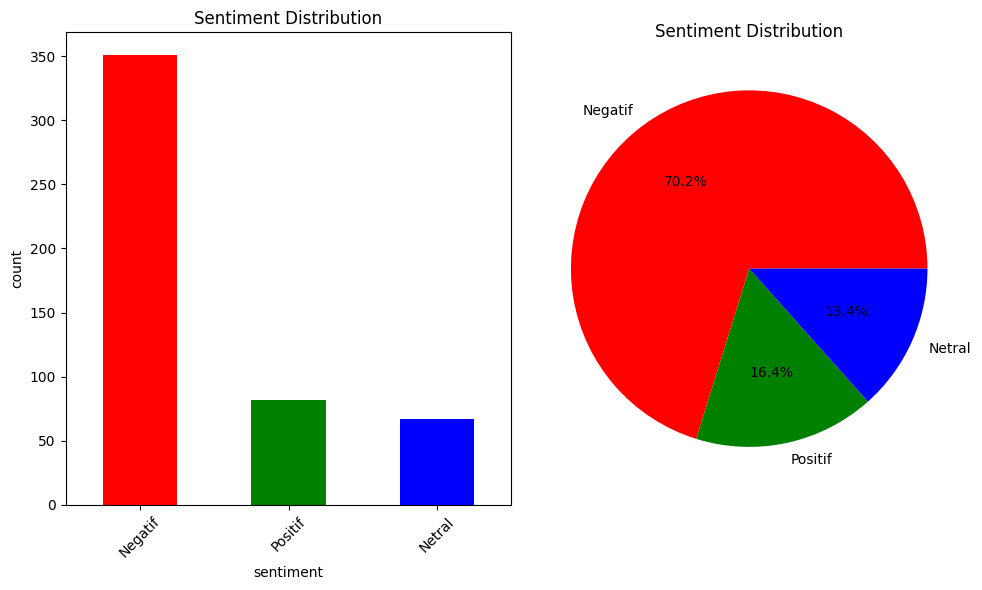

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sentiment_counts.plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('sentiment')
plt.ylabel('count')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['red', 'green', 'blue'])
plt.title('Sentiment Distribution')
plt.tight_layout()
plt.show()

# Splitting & Encoding

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['sentiment'])

X_train, X_test, y_train, y_test = train_test_split(X_padded, y_encoded, test_size = 0.2, random_state = 42)

print(f"training: {X_train.shape}")
print(f"testing: {X_test.shape}")

training: (400, 100)
testing: (100, 100)


# 6. Modelling

In [23]:
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Embedding(MAX_VOCAB_SIZE, 64),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

In [24]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience=5,
    restore_best_weights=True
)

# Training Model

In [26]:
training_model = model.fit(
    X_train, y_train,
    epochs = 20,
    validation_data = (X_test, y_test),
    callbacks = [early_stopping],
    verbose = 1
)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 276ms/step - accuracy: 0.5963 - loss: 1.0105 - val_accuracy: 0.6400 - val_loss: 0.9724
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7065 - loss: 0.8211 - val_accuracy: 0.6400 - val_loss: 0.9009
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7122 - loss: 0.7937 - val_accuracy: 0.6400 - val_loss: 0.8873
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7280 - loss: 0.7234 - val_accuracy: 0.6400 - val_loss: 0.8522
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7192 - loss: 0.7032 - val_accuracy: 0.6400 - val_loss: 0.8640
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7279 - loss: 0.6719 - val_accuracy: 0.6100 - val_loss: 0.8786
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7913 - loss: 0.5222 - val_accuracy: 0.6100 - val_loss: 0.8876
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9088 - loss: 0.2621 - val_accuracy: 0.6300 -

# 7. Model Evaluation

In [27]:
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose = 0)
print(f"Test Acuracy: {model_accuracy}")
print(f"Test Loss: {model_loss}")

Test Acuracy: 0.6399999856948853
Test Loss: 0.8521600365638733


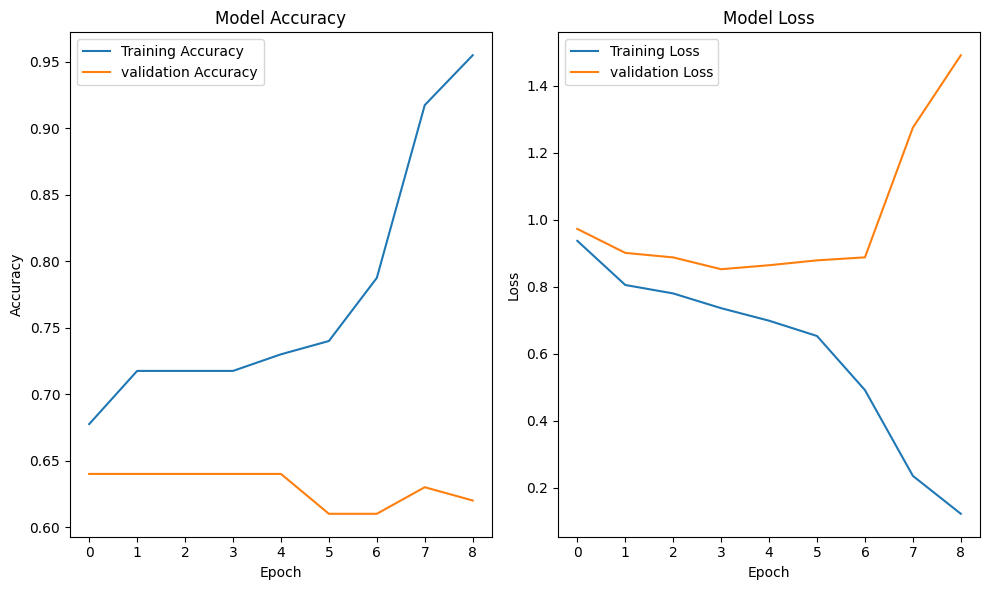

In [28]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(training_model.history['accuracy'], label='Training Accuracy')
plt.plot(training_model.history['val_accuracy'], label='validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(training_model.history['loss'], label='Training Loss')
plt.plot(training_model.history['val_loss'], label='validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 8. New Data Prediction

In [29]:
data_baru = [
    "Kematian itu merupakan peristiwa yang tidak bisa diprediksi",
    "Charlie Kirk merupakan orang yang baik dan peduli",
    "Charlie Kirk adalah orang yang buruk dan tidak berperasaan",
]

data_baru_clean = [preprocess_text(text) for text in data_baru]
new_sequences = tokenizer_tf.texts_to_sequences(data_baru_clean)
new_padded = pad_sequences(new_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

predictions = model.predict(new_padded)

predicted_labels = np.argmax(predictions, axis=1)
predicted_sentiments = label_encoder.inverse_transform(predicted_labels)

for text, sentiment in zip(data_baru, predicted_sentiments):
  print(f"Text: {text}")
  print(f"Sentiment: {sentiment}")

print(f"\nKesimpulan: class imbalance menyebabkan semua data menjadi sentiment negatif")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
Text: Kematian itu merupakan peristiwa yang tidak bisa diprediksi
Sentiment: Negatif
Text: Charlie Kirk merupakan orang yang baik dan peduli
Sentiment: Negatif
Text: Charlie Kirk adalah orang yang buruk dan tidak berperasaan
Sentiment: Negatif

Kesimpulan: class imbalance menyebabkan semua data menjadi sentiment negatif
